<a href="https://colab.research.google.com/github/korayaslaan/artificial_intelligence/blob/main/yunus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
!pip install opendatasets --upgrade --quiet
!pip install pandas-profiling --upgrade --quiet

In [75]:
!conda update --all --quiet

/bin/bash: conda: command not found


In [76]:
# Import libraries
import opendatasets as od

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import sys

# Data science tools
import pandas as pd
import numpy as np
import scipy as sp
import psutil, os


# Scikit-learn library
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Visualizations
import matplotlib.pyplot as plt
import matplotlib.image as mimg # images
%matplotlib inline
import seaborn as sns
from pandas.plotting import scatter_matrix

In [77]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"

In [78]:
names =["id" ,"clump_thickness", "uniform_cell_size", "uniform_cell_shape", "marginal_adhesion", "single_epithelial_size", "bare_nuclei", "bland_chromaton", "normal_nucleoli", "nutises", "class"]

In [79]:
df = pd.read_csv(url, names=names)

In [80]:
df.head()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromaton,normal_nucleoli,nutises,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [81]:
df.describe(include = "all")

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromaton,normal_nucleoli,nutises,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699,699.000000,699.000000,699.000000,699.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,402,NaN,NaN,NaN,NaN
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,NaN,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,NaN,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000


Veri Önişlemesi

In [82]:
def MissingUniqueStatistics(df):

    import io
    import pandas as pd
    import psutil
    import os
    import gc
    import time
    import seaborn as sns
    from IPython.display import display, HTML
    from io import BytesIO
    import base64

    proc = psutil.Process(os.getpid())#süreç kaynaklarını sınırlamada kullanılır
    gc.collect()#çöp toplama işlemi
    mem_0 = proc.memory_info().rss#içerik takibini sağlar
    start_time = time.time()#kaç saniye süreceğini tespit etmek için kullanılır 

    variable_name_list = []
    total_entry_list = []
    data_type_list = []
    unique_values_list = []
    number_of_unique_values_list = []
    missing_value_number_list = []
    missing_value_ratio_list = []#oran
    mean_list = []
    std_list = []
    min_list = []
    Q1_list = []
    Q2_list = []
    Q3_list = []
    max_list = []

    df_statistics = df.describe().copy()#listeyi kopyalama işlemi

    for col in df.columns:#listedeki kolonlar kadar döner
        #shape = Bir dizinin şekli (shape), dizinin her boyutundaki (dimension, örneğin 1D, 2D gibi) elemanların sayısıdır.
        variable_name_list.append(col)#değerlerin isimlerini çeker
        total_entry_list.append(df.loc[:, col].shape[0])#toplam data sayısı
        data_type_list.append(df.loc[:, col].dtype)#gelen dataların tiplerini
        unique_values_list.append(list(df.loc[:, col].unique()))#benzersiz değerleri değişkene atar
        number_of_unique_values_list.append(len(list(df.loc[:, col].unique())))#benzersiz değişken sayısı
        missing_value_number_list.append(df.loc[:, col].isna().sum())#işlenemeyen değerlerin numaraları
        missing_value_ratio_list.append(#işlenmeyen değerlerin oranları
            round((df.loc[:, col].isna().sum()/df.loc[:, col].shape[0]), 4))

        try:
            mean_list.append(df_statistics.loc[:, col][1])#kolonlardaki değişkenler listeye alınıyor
            std_list.append(df_statistics.loc[:, col][2])
            min_list.append(df_statistics.loc[:, col][3])
            Q1_list.append(df_statistics.loc[:, col][4])
            Q2_list.append(df_statistics.loc[:, col][5])
            Q3_list.append(df_statistics.loc[:, col][6])
            max_list.append(df_statistics.loc[:, col][7])
        except:
            mean_list.append('NaN')#eğer değer yok ise NaN değeri atanıyor
            std_list.append('NaN')
            min_list.append('NaN')
            Q1_list.append('NaN')
            Q2_list.append('NaN')
            Q3_list.append('NaN')
            max_list.append('NaN')

    #veriyi tablo formatına çevirerek daha anlaşılır ve doğru bir yapıya çeviriyor
    data_info_df = pd.DataFrame({'Variable': variable_name_list,
                                '#_Total_Entry': total_entry_list,
                                 '#_Missing_Value': missing_value_number_list,
                                 '%_Missing_Value': missing_value_ratio_list,
                                 'Data_Type': data_type_list,
                                 'Unique_Values': unique_values_list,
                                 '#_Unique_Values': number_of_unique_values_list,
                                 'Mean': mean_list,
                                 'STD': std_list,
                                 'Min': min_list,
                                 'Q1': Q1_list,
                                 'Q2': Q2_list,
                                 'Q3': Q3_list,
                                 'Max': max_list
                                 })

    data_info_df = data_info_df.set_index("Variable", inplace=False)
    #yeni bir dizin oluşturur set_index
    print('Veri sınıflandırma ve düzenleme işlemi başarıyla tamamlandı!')
    print("--- %s dakikada tamamlandı ---" % ((time.time() - start_time)/60))
    #geçen toplam zamanı bulur

    return data_info_df.sort_values(by='%_Missing_Value', ascending=False)

In [83]:
data_info = MissingUniqueStatistics(df)
data_info["Variable Structure"] = ["Cardinal","Nominal","Nominal","Nominal","Nominal","Nominal","Nominal","Nominal","Nominal","Nominal","Nominal"]
data_info

Veri sınıflandırma ve düzenleme işlemi başarıyla tamamlandı!
--- 0.0009357810020446777 dakikada tamamlandı ---


,#asdasd,#_Missing_Value,%_Missing_Value,Data_Type,Unique_Values,#_Unique_Values,Mean,STD,Min,Q1,Q2,Q3,Max,Variable Structure
Variable,,,,,,,,,,,,,,
id,699,0,0.0,int64,"[1000025, 1002945, 1015425, 1016277, 1017023, ...",645,1071704.098712,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0,Cardinal
clump_thickness,699,0,0.0,int64,"[5, 3, 6, 4, 8, 1, 2, 7, 10, 9]",10,4.41774,2.815741,1.0,2.0,4.0,6.0,10.0,Nominal
uniform_cell_size,699,0,0.0,int64,"[1, 4, 8, 10, 2, 3, 7, 5, 6, 9]",10,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0,Nominal
uniform_cell_shape,699,0,0.0,int64,"[1, 4, 8, 10, 2, 3, 5, 6, 7, 9]",10,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0,Nominal
marginal_adhesion,699,0,0.0,int64,"[1, 5, 3, 8, 10, 4, 6, 2, 9, 7]",10,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0,Nominal
single_epithelial_size,699,0,0.0,int64,"[2, 7, 3, 1, 6, 4, 5, 8, 10, 9]",10,3.216023,2.2143,1.0,2.0,2.0,4.0,10.0,Nominal
bare_nuclei,699,0,0.0,object,"[1, 10, 2, 4, 3, 9, 7, ?, 5, 8, 6]",11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nominal
bland_chromaton,699,0,0.0,int64,"[3, 9, 1, 2, 4, 5, 7, 8, 6, 10]",10,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0,Nominal
normal_nucleoli,699,0,0.0,int64,"[1, 2, 7, 4, 5, 3, 10, 6, 9, 8]",10,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0,Nominal


In [84]:
# preprocess the data
df.replace("?",-999999, inplace = True)
print(df.axes)
df.drop(["id"],1, inplace = True)

# print the shape of the dataset
print(df.shape)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromaton', 'normal_nucleoli', 'nutises', 'class'],
      dtype='object')]
(699, 10)


In [85]:
df.loc[6]

clump_thickness            1
uniform_cell_size          1
uniform_cell_shape         1
marginal_adhesion          1
single_epithelial_size     2
bare_nuclei               10
bland_chromaton            3
normal_nucleoli            1
nutises                    1
class                      2
Name: 6, dtype: object

In [86]:
df.describe()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bland_chromaton,normal_nucleoli,nutises,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


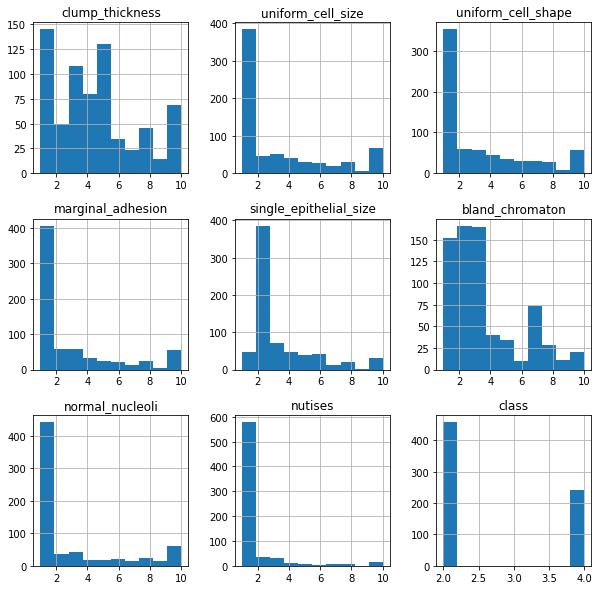

In [87]:
df.hist(figsize=(10,10))
plt.show()

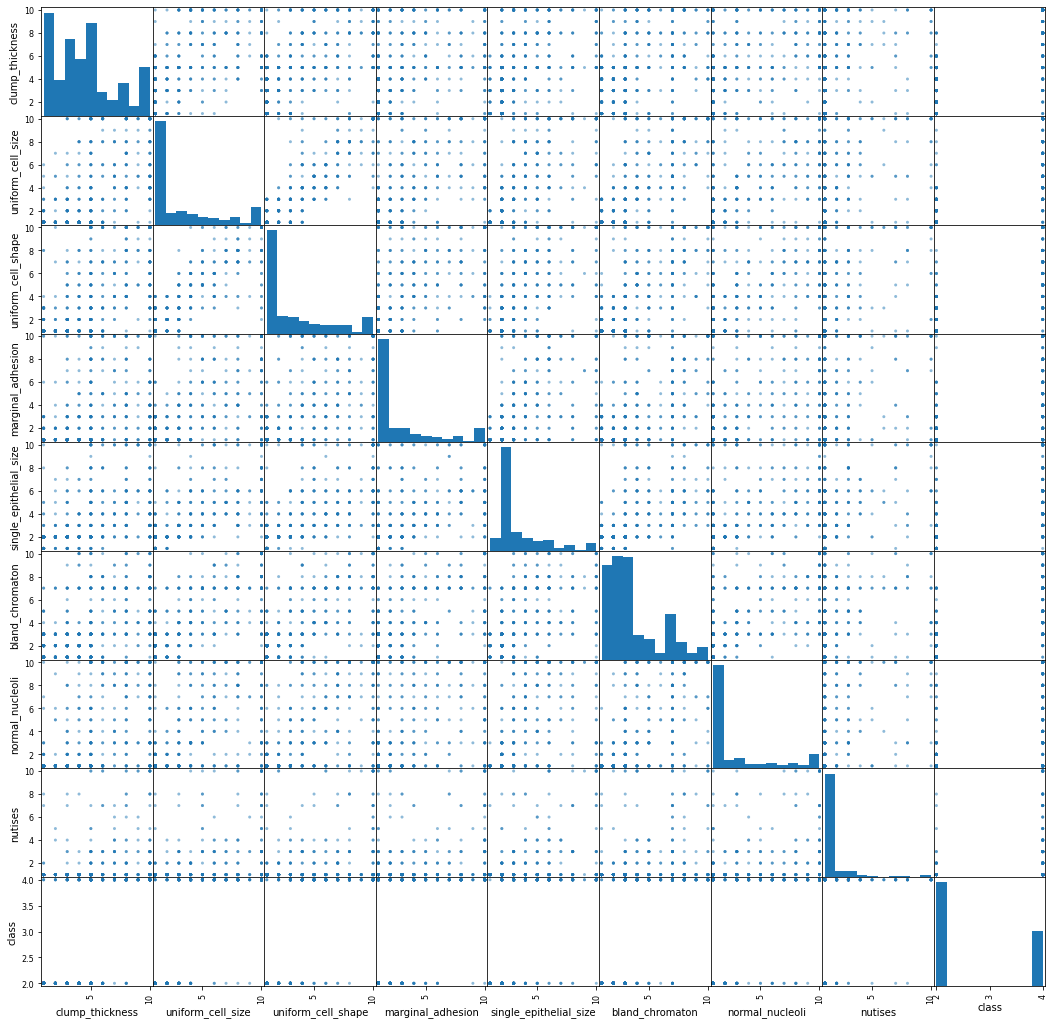

In [88]:
scatter_matrix(df, figsize=(18,18))
plt.show()

In [102]:
# Create X and Y datasets for training
X = np.array(df.drop(["class"],1))
y = np.array(df["class"])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size=0.8)

In [103]:
models = []
models.append(("KNN", KNeighborsClassifier(n_neighbors = 5)))
models.append(("SVC",SVC()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state = 8, shuffle = True)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv= kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    
    msg = "{}: mean :{:.3f}  standard deviation:{:.3f}".format(str(name),cv_results.mean(), cv_results.std())
    print(msg)

KNN: mean :0.957  standard deviation:0.035
SVC: mean :0.684  standard deviation:0.090


In [104]:
for name,model in models:
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    print("{}: {:.3f}".format(name, accuracy_score(y_test,predictions)))
    print(classification_report(y_test, predictions))

KNN: 0.961
              precision    recall  f1-score   support

           2       0.96      0.98      0.97       363
           4       0.95      0.93      0.94       197

    accuracy                           0.96       560
   macro avg       0.96      0.95      0.96       560
weighted avg       0.96      0.96      0.96       560

SVC: 0.648
              precision    recall  f1-score   support

           2       0.65      1.00      0.79       363
           4       0.00      0.00      0.00       197

    accuracy                           0.65       560
   macro avg       0.32      0.50      0.39       560
weighted avg       0.42      0.65      0.51       560



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [114]:
clf = KNeighborsClassifier()

clf.fit(X_train, y_train)
print("Doğruluk Oranı: {:.3f}".format(clf.score(X_test, y_test)))

example_measures = np.array([[4,1,1,1,2,1,3,1,1]])
example_measures = example_measures.reshape(len(example_measures), -1)
prediction = clf.predict(example_measures)

if(prediction == 4):
  print("Hasta")
else:
  print("Sağlıklı")

Doğruluk Oranı: 0.961


AttributeError: ignored